In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
xauusd = pd.read_csv('XAUUSD_historical_data.csv', delimiter=',')
xauusd.set_index('date', inplace=True)
xauusd.sort_index(ascending=True, inplace=True)

usdjpy = pd.read_csv('USDJPY_historical_data.csv', delimiter=',')
usdjpy.set_index('date', inplace=True)
usdjpy.sort_index(ascending=True, inplace=True)

In [3]:
#usdjpy['close'] = 1/usdjpy['close']

In [4]:
xauusd['gld_pct_change'] = round(xauusd.close.pct_change(),3)
usdjpy['jpy_pct_change'] = round(usdjpy.close.pct_change(),3)

<AxesSubplot:>

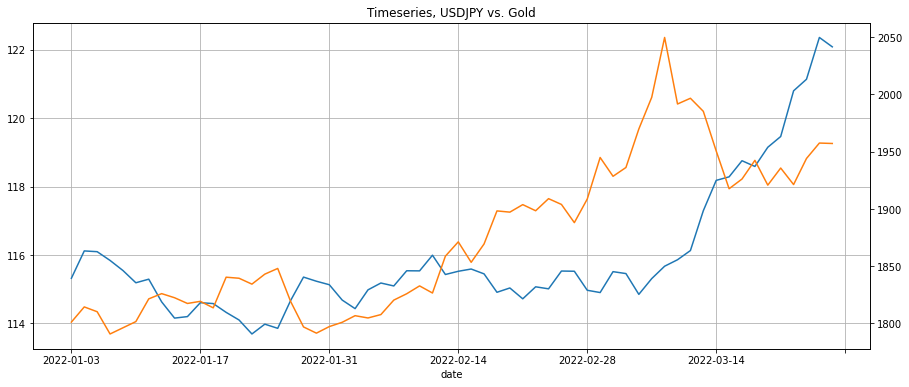

In [5]:
bx = usdjpy['close'].plot(figsize=(15, 6), grid=True, title='Timeseries, USDJPY vs. Gold')
xauusd['close'].plot(figsize=(15, 6), grid=True, ax=bx, secondary_y = True)

In [6]:
df = xauusd[['gld_pct_change']].merge(usdjpy[['jpy_pct_change']], how='inner', on='date')

In [7]:
df.dropna(inplace=True)
df.sort_index(ascending=True, inplace=True)

In [8]:
df.corr(method='spearman')

,gld_pct_change,jpy_pct_change
gld_pct_change,1.000000,-0.333922
jpy_pct_change,-0.333922,1.000000


In [9]:
df.corr(method='pearson')

,gld_pct_change,jpy_pct_change
gld_pct_change,1.000000,-0.342934
jpy_pct_change,-0.342934,1.000000


In [10]:
df.corr(method='kendall')

,gld_pct_change,jpy_pct_change
gld_pct_change,1.000000,-0.240751
jpy_pct_change,-0.240751,1.000000


In [11]:
df['rolling_corr'] = df['gld_pct_change'].rolling(25).corr(df['jpy_pct_change'])

<AxesSubplot:title={'center':'30-Day Correlation of Returns, USDJPY vs. XAUUSD'}, xlabel='date'>

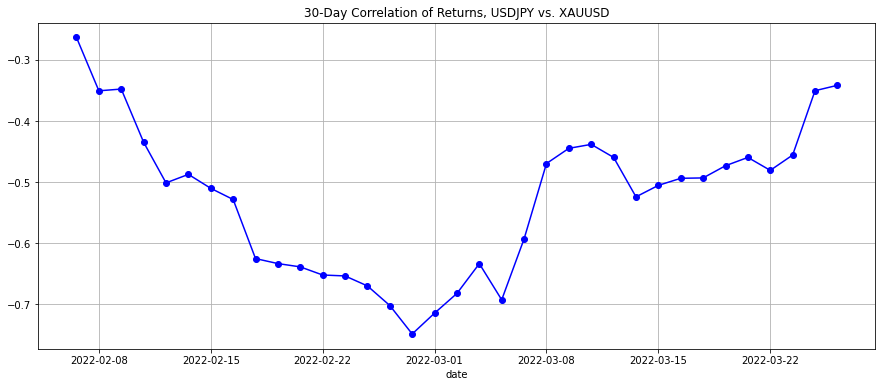

In [13]:
df['rolling_corr'].plot(figsize=(15,6), grid=True, style=['b-o'], title='30-Day Correlation of Returns, USDJPY vs. XAUUSD')

In [14]:
myfxbook = pd.read_csv('myfxbook_corr.csv', sep=',')
myfxbook.set_index('date', inplace=True)
myfxbook.sort_index(ascending=True, inplace=True)

In [15]:
corr_compare = myfxbook.merge(df[['rolling_corr']], how='inner', on='date')
#corr_compare['myfxbook_corr'] = 0 - corr_compare['myfxbook_corr']
corr_compare['rolling_corr'] = round(corr_compare['rolling_corr'],3)

Text(0, 0.5, 'Pandas Correlation')

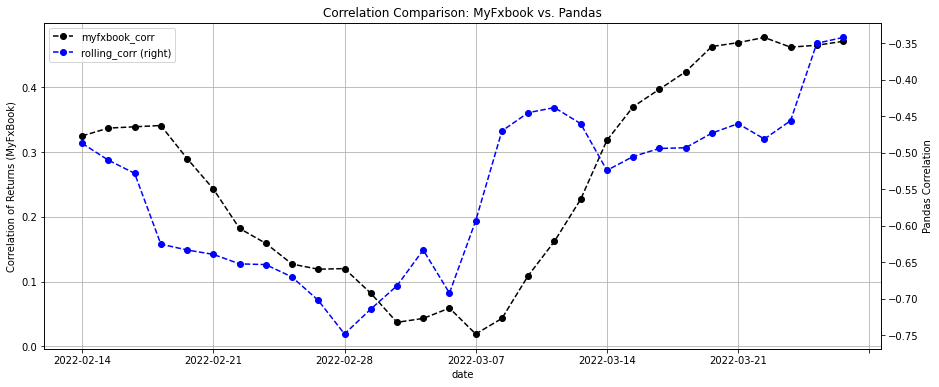

In [17]:
ax = corr_compare['myfxbook_corr'].plot(ylabel = "Correlation of Returns (MyFxBook)", y = 'MyFxBook Corr', figsize=(15, 6), grid=True, style=['k--o'], title='Correlation Comparison: MyFxbook vs. Pandas', legend=True)
corr_compare['rolling_corr'].plot(grid = True, figsize=(15, 6), style = ['b--o'], ax=ax, secondary_y=True, legend=True)
plt.ylabel('Pandas Correlation', rotation = 90)

In [18]:
corr_compare['diff'] = (corr_compare['myfxbook_corr'] - corr_compare['rolling_corr'])*100

<AxesSubplot:xlabel='date'>

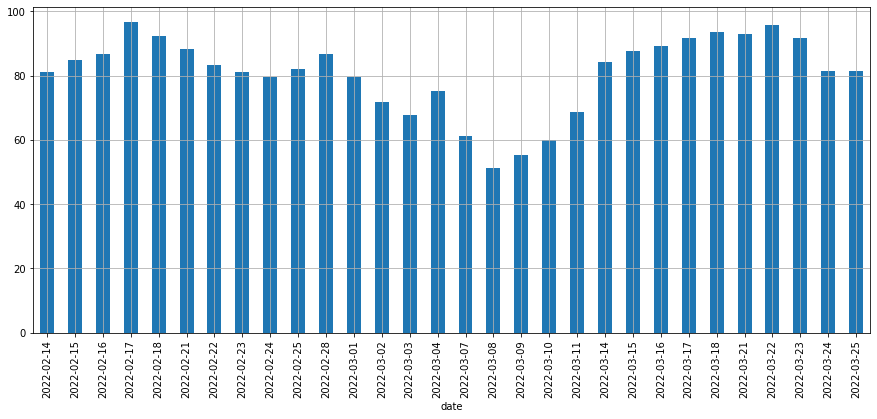

In [19]:
corr_compare['diff'].plot(figsize=(15, 6), grid= True, kind='bar')

In [20]:
corr_compare.tail()

,myfxbook_corr,rolling_corr,diff
date,,,
2022-03-21,0.469,-0.460,92.9
2022-03-22,0.477,-0.481,95.8
2022-03-23,0.462,-0.456,91.8
2022-03-24,0.465,-0.350,81.5
2022-03-25,0.471,-0.342,81.3


In [21]:
import scipy.stats as stats

In [22]:
r, p = stats.pearsonr(df.dropna()['gld_pct_change'], df.dropna()['jpy_pct_change'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: -0.42676284215358057 and p-value: 0.010568288903525638
